<br/>设计一个巴特沃斯低通滤波器，其通带截止频率$f_{p}=3000Hz$，通带最大衰减$R_{p}=2dB$，阻带截止频率$f_{s}=6000Hz$，阻带最小衰减$A_{s}=30dB$。</br>

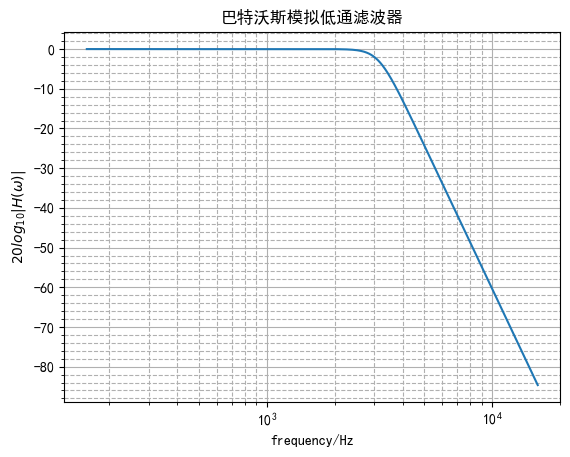

In [1]:
#导入使用的库
import numpy as np
from scipy import signal;from math import *
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator,MultipleLocator

#滤波器参数
fp = 3000;fs = 6000 
Rp = 2;As = 30

#计算所需的巴特沃斯滤波器阶数
N, Wn = signal.buttord(2*pi*fp,2*pi*fs,Rp,As,True) 

#计算巴特沃斯模拟滤波器的系统函数和频率响应
b, a = signal.butter(N,Wn,'low',True) 
w, h = signal.freqs(b, a,np.logspace(3,5,1000))
Hw = 20*np.log10(abs(h))

#绘制滤波器的幅度响应
fig,ax = plt.subplots();ax.semilogx(w/(2*pi),Hw)
ax.grid(which = 'major',axis = 'both')
ax.grid(which = 'minor',ls = '--')
ax.set_title('巴特沃斯模拟低通滤波器');ax.set_xlabel('frequency')
ax.set_xlabel('frequency/Hz')
ax.set_ylabel(r'$ 20log_{10}| H ( \omega ) | $')
ax.yaxis.set_major_locator(MaxNLocator(11))
ax.yaxis.set_minor_locator(MultipleLocator(2))
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来显示负号
fig.savefig('./butter.png',dpi=500)